In [1]:
import gzip
from PIL import Image
import numpy as np
import io
import os
import matplotlib.pyplot as plt
import cv2

In [5]:
def process_images(src_directory, dest_directory, new_size=(512, 512)):
    for root, dirs, files in os.walk(src_directory):
        for file in files:
            file_path = os.path.join(root, file)
            img = Image.open(file_path)
            
            img = img.resize(new_size, Image.LANCZOS)
            # image = img.convert('RGB')
            # image_np = np.array(image)
            # green_channel_gray = image_np[:, :, 1]
            # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
            # green_channel_clahe = clahe.apply(green_channel_gray)

            # output_image = Image.fromarray(green_channel_clahe)
            output_image = img
            output_file_name = os.path.splitext(file)[0] + '.png'
            output_file_path = os.path.join(dest_directory, output_file_name)
            output_image.save(output_file_path, 'PNG')

def process_target(src_directory, dest_directory, new_size=(512, 512)):
    for root, dirs, files in os.walk(src_directory):
        for file in files:
            file_path = os.path.join(root, file)
            img = Image.open(file_path)

            img = img.resize(new_size, Image.LANCZOS)

            output_image = img
            output_file_name = os.path.splitext(file)[0] + '.png'
            output_file_path = os.path.join(dest_directory, output_file_name)
            output_image.save(output_file_path, 'PNG')


src_image_paths = ['DRIVE/train/images', 'DRIVE/test/images']
# src_target_paths = ['DRIVE/train/1st_manual']
# dest_image_paths = ['DRIVE_processed/train/image', 'DRIVE_processed/test']
dest_image_paths = ['DRIVE_processed/train/image1', 'DRIVE_processed/test1']
# dest_target_paths = ['DRIVE_processed/train/target']

for src_directory_path, dest_directory_path in zip(src_image_paths, dest_image_paths):
    process_images(src_directory_path, dest_directory_path)

# for src_directory_path, dest_directory_path in zip(src_target_paths, dest_target_paths):
#     process_target(src_directory_path, dest_directory_path)


(512, 512)


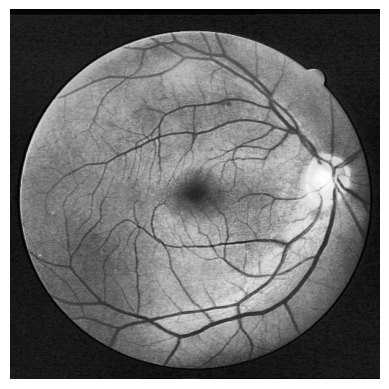

In [2]:
# 加载图片
image_path = 'DRIVE_processed/test/13_test.png'  # 替换为你的图片路径
image = Image.open(image_path)
print(np.array(image).shape)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

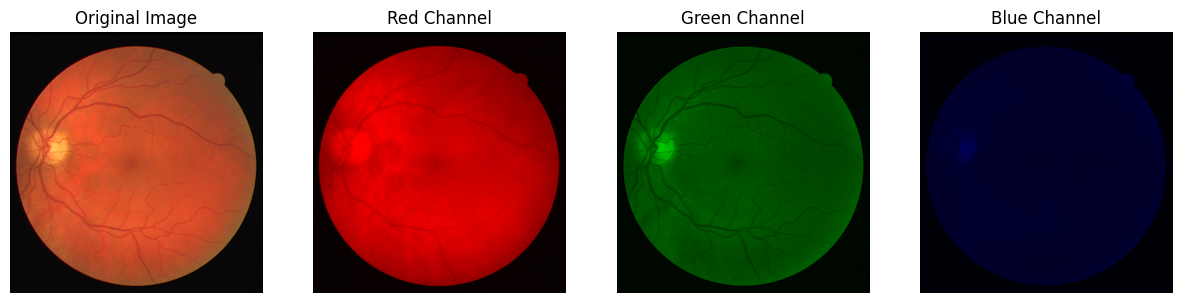

In [3]:
# 加载图片
image_path = 'DRIVE/test/images/05_test.tif'  # 替换为你的图片路径
image = Image.open(image_path)

# 确保图片是RGB模式
image = image.convert('RGB')

# 将图片转换为NumPy数组
image_np = np.array(image)

# 分离RGB通道
red_channel = image_np.copy()
red_channel[:, :, 1] = 0  # 将G通道置为0
red_channel[:, :, 2] = 0  # 将B通道置为0

green_channel = image_np.copy()
green_channel[:, :, 0] = 0  # 将R通道置为0
green_channel[:, :, 2] = 0  # 将B通道置为0

blue_channel = image_np.copy()
blue_channel[:, :, 0] = 0  # 将R通道置为0
blue_channel[:, :, 1] = 0  # 将G通道置为0

# 显示原图和分离后的通道
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(image_np)
axes[0].set_title('Original Image')
axes[1].imshow(red_channel)
axes[1].set_title('Red Channel')
axes[2].imshow(green_channel)
axes[2].set_title('Green Channel')
axes[3].imshow(blue_channel)
axes[3].set_title('Blue Channel')

for ax in axes:
    ax.axis('off')

plt.show()


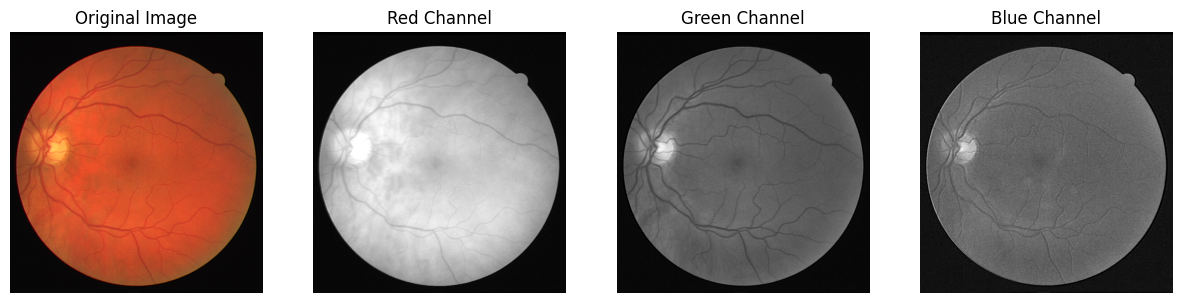

In [4]:
# 分离RGB通道并转换为灰度图像
red_channel_gray = image_np[:, :, 0]
green_channel_gray = image_np[:, :, 1]
blue_channel_gray = image_np[:, :, 2]

# 显示原图和灰度化后的通道
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(image_np)
axes[0].set_title('Original Image')
axes[1].imshow(red_channel_gray, cmap='gray')
axes[1].set_title('Red Channel')
axes[2].imshow(green_channel_gray, cmap='gray')
axes[2].set_title('Green Channel')
axes[3].imshow(blue_channel_gray, cmap='gray')
axes[3].set_title('Blue Channel')

for ax in axes:
    ax.axis('off')

plt.show()


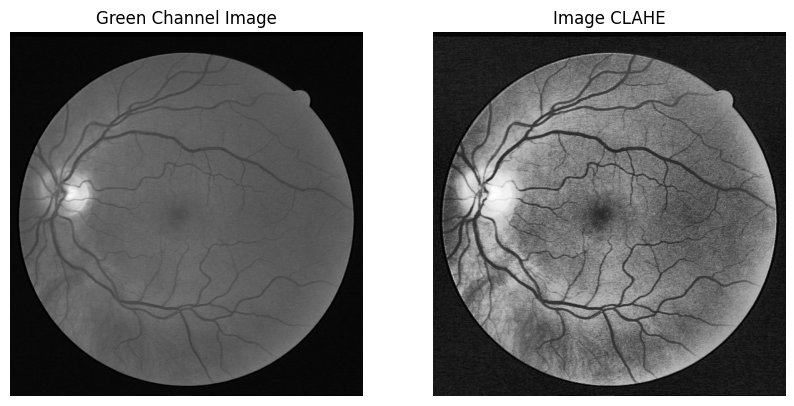

In [7]:
import cv2
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(4, 4))
green_channel_clahe = clahe.apply(green_channel_gray)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(green_channel_gray, cmap='gray')
axes[0].set_title('Green Channel Image')
axes[1].imshow(green_channel_clahe, cmap='gray')
axes[1].set_title('Image CLAHE')
for ax in axes:
    ax.axis('off')

plt.show()
